$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\ffud}[2]{\frac{\mathrm{d}^2 #1}{\mathrm{d} #2^2}}
\newcommand{\dd}{\,\mathrm{d}}
$$

# Bubble motion in a sound field

<img src="lichtenberg1.png" width=300px>

<img src="lichtenberg2.png" width=300px>

<img src="book.png" width=500px>

----
The Bjerknes force is defined as

$$\vb{F}_B=-\left<V(t)\,\nabla p(\vb{x},t)\right>_{t_{av}}\tag{1}\quad,$$

where $V=(4\pi/3)R^3(t)$ is the bubble volume and $\nabla p(\vb{x},t)$ the gradient of the pressure, and $\left<\dots\right>_{t_{av}}$ denotes a time average of the expression. This time average should be taken over one period of oscillation: 

$$\left<f(t) \right>_{t_{av}}=\frac{1}{T}\int_0^T f(t)\,\mathrm{d}t\tag{2}\quad .$$

We will first derive the expression for the Bjerknes force generated by an external sound field and then look at the interaction of two bubbles exposed two the sound of each other.

## Primary Bjerknes Force in a Standing Wave

We assume a bubble is driven by an external sound field $p(t)$. The sound field is further assumed to be a standing wave.

Generally, a standing wave can be constructed from the superposition of an outgoing and incoming wave, e.g.

$$p=p_a\sin(kx-\omega t )+p_a\sin(kx+\omega t)=2\,p_a\sin(kx)\cos(\omega t)\tag{3}\quad .$$

The primary Bjerknesforce is a time average of the spatial pressure gradient and the bubble volume. The spatial gradient is:

$$\nabla p=2\,p_a\,k\cos(kx)\cos(\omega t)\,\vb{e}_x\tag{4}\quad .$$

Let's assume the bubble undergoes harmonic oscilation around an equilibrium radius $R_0$, i.e. 

$$R(t)=R_0 (1-\eps\sin(kx)\cos(\omega t-\varphi))\tag{5}\quad .$$

Here the amplitude $R_0 \eps$ is modulated by the local and temporal pressure $\sin(kx)\cos(\omega t-\varphi)$.
Note the - sign in front of the harmonic driving. A small bubble shrinks when the pressure is high and expands when it is low. The bubble oscillates in phase and $\varphi=0$. Thus in general we can distinguish between bubbles smaller than resonance size that are oscillating in phase $\varphi=0$ and a bubbles much larger than resonance size that are oscillating out of phase, $\varphi=\pi$. The amplitude $\eps$ of oscillation is a function of the frequency and dissipation.

The volume oscillation $V(t)$ can be approximated with a Taylor expansion to first order:

$$V(t)=\frac{4\pi}{3}\,R^3(t)=\frac{4\pi}{3}\,R_0^3\left(1-\eps\sin(kx)\cos(\omega t -\varphi)\right)^3\approx V_0\left(1-3\eps\sin(kx)\cos(\omega t-\varphi)\right)\tag{6}$$

Now we insert above expression into the definition of the Bjerknes force.

$$\vb{F}_B=-\left<V(t)\nabla p\right>_{av}=
-\vb{e}_x\,V_0\frac{2 p_a k}{T}\int_0^T \left(1-3\eps\cos(kx)\cos(\omega t -\varphi)\right)\left(\sin(kx)\cos(\omega t)\right)\mathrm{d}t \tag{7}$$

and calculate the parts. Integrals of products of $\sin^n$ $\cos^n$ with odd power ($n=1,3,\dots$) are zero over one period. 

$$F_B=-\frac{\omega}{\pi} V_0 p_A k \int_0^T \underbrace{\sin(kx)\cos(\omega t)}_{=0} - 3\eps\sin(kx)\cos(kx)\cos(\omega t-\varphi)\cos(\omega t)\mathrm{d}t\tag{8}$$

$$F_B=\frac{3\omega}{\pi}  V_0 p_A k \, \eps\underbrace{\sin(kx)\cos(kx)}_{\frac{1}{2}\sin(2 k x)}\int_0^T \underbrace{\cos^2(\omega t)}_{=\pi}\cos(\varphi)+\underbrace{\sin(\omega t)\cos(\omega t)}_{=0}\sin(\varphi)\mathrm{d}t\tag{9}$$

The final result is 

$$F_B=\frac{3}{2} V_0 p_A k \eps \sin(2 k x)\cos(\varphi)\tag{10}\quad .$$

In [16]:
%matplotlib inline

import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['font.size'] = 15

x = np.linspace(0.,2.*np.pi, 1000)
omega=1.
k=1.

plt.figure(1, figsize=(8, 6));

def update_plot(x0,phi):
    Fb=np.sin(2*k*x0)*np.cos(phi)
    plt.clf()
    ax=plt.gca()
    ax.plot(x,np.sin(k*x),'k-')
    ax.plot(x,-np.sin(k*x),'k-')
    ax.plot(x,np.sin(2.*k*x),'r')
    ax.plot(x0,np.sin(k*x0),'o',markersize=12+24*(phi/np.pi))
    plt.arrow(x0, np.sin(k*x0), Fb, 0.,width=0.05)
    ax.axhline(linewidth=1, color='k')
    ax.set_xlabel(r'space $x$')
    ax.set_xlim(0, 2.*np.pi)
    ax.set_ylim(-1.1, 1.1) 
    plt.show();

x0w=widgets.FloatSlider(value=np.pi, description=r'$x_b$', max=2*np.pi, min=0, step=np.pi/10.)
phiw=widgets.FloatSlider(value=0., description=r'$\varphi$', max=np.pi, min=0., step=np.pi/10.)

widgets.interactive(update_plot, x0=x0w, phi=phiw)


interactive(children=(FloatSlider(value=3.141592653589793, description='$x_b$', max=6.283185307179586, step=0.…

<Figure size 576x432 with 0 Axes>

## Primary Bjerknes Force for a Travelling Wave

Now let's derive the primary Bjerknes force for a travelling wave. The pressure is then just then

$$p=p_a \sin(kx-\omega t)=-p_a \sin(\omega t -kx)\tag{11}$$

the gradient

$$\nabla p=-p_a k \cos(\omega t - k x)\vb{e}_x\tag{12}$$

and the volume undergoes harmonic oscillations, using the same notation as before, Eq.(5), but account for the sine function for the pressure and the negative sign for the pressure:

$$R(t)=R_0 (1+\eps\sin(\omega t-kx-\varphi))\tag{13}\quad .$$

Now we insert again Eq.(11), Eq.(12), and Eq. (13) into the definition of the Bjerknes force, Eq. (2).

$$\vb{F}_B=-\left<V(t)\nabla p\right>_{av}=
-\vb{e}_x\,V_0\frac{p_a k}{T}\int_0^T \left[1+3\eps\sin(\omega t - kx -\varphi)\right]\cos(\omega t-kx)\,\mathrm{d}t \tag{14}$$

The first multiplicand in the integral can be rewritten through trigonometric identities and we obtain

$$\vb{F}_B=-\vb{e}_x\,V_0\frac{p_a k}{T}\int_0^T \left[1+3\eps\left(\sin(\omega t - kx)\cos\varphi-\cos(\omega t - kx)\sin\varphi\right)\right]\cos(\omega t-kx)\,\mathrm{d}t \tag{15}$$

Again as above the mixed products of sine and cosine result to 0 under the integral, and only the $\cos^2(\omega t-kx)$ gives a contribution with a factor $1/2$, thus:

$$\vb{F}_B=\frac{V_0 k p_a \eps}{2}\sin\varphi\,\vb{e}_x \tag{15}$$

From Eq.(15) it becomes obvious that the force is always in the direction of the propagating pressure wave as the amplitude $\eps$ is a positive number and $\varphi$ is between $0$ (small bubbles in phase) and $\pi$ (large bubbles out of phase).



## Secondary Bjerknes Force between two oscillating bubbles

The velocity field of a bubble

$$u_r=\frac{R^2\dot{R}}{r^2}\tag{16}$$

We need later this expression for the temporal derivative of the Volume

$$\fud{V}{t}=\frac{4\pi}{3}\fud{R^3}{t}=4\pi\left(R^2\dot{R}\right)\quad .\tag{17}$$

To obtain the pressure radiated by a spherical oscillating bubble we make use the Euler Equation in spherical coordinate

$$\rho\pad{u_r}{t}+u_r\pad{u_r}{r}=-\pad{p}{r}\quad . \tag{18}$$

By ignore the convective derivative (why?) we can integrate Eq.(18) with respect to $r$

$$\pad{p}{r}=-\frac{\rho}{r^2}\fud{}{t}\left(R^2\dot{R}\right)$$

and therefore we obtain

$$p=\frac{\rho}{r}\fud{}{t}\left(R^2\dot{R}\right)\quad .\tag{19}$$

The effect of a bubble oscillating next to a second bubble is *twofold*:
* it generates an additional driving pressure for the second bubble and
* it generates a pressure gradient resulting in a force on the second bubble.

Let's focus on the *instantaneous force* oscillating bubble 1 generates on bubble 2

$$\vb{F}_{12}=-V_2\nabla p_1\quad .$$

Inserting Eq.(19) for bubble 2 at a distance $r=d$:

$$\vb{F}_{12}=-V_2 \left. \pad{p_1}{r} \right|_{r=d} \vb{e}_r=
V_2\frac{\rho}{d^2}\fud{}{t}\left(R^2\dot{R}\right)\vb{e}_r=
\frac{\rho}{4\pi\,d^2} V_2\ffud{V_1}{t}\vb{e}_r\tag{20}\quad .$$

Integration by parts of Eq.(20) we can reduce the order the temporal derivative:

$$\frac{1}{T}\int_0^T V_2 \ddot{V_1} \mathrm{d}t=\left. V_2 \dot{V_1}\right|_0^T - \int_0^T \dot{V_2}\dot{V_1}\mathrm{d}t\tag{21}\quad ,$$

because the first term on the R.H.S. for periodic expressions is 0. Thus

$$\frac{1}{T}\int_0^T V_2 \ddot{V_1} \mathrm{d}t=- \int_0^T \dot{V_2}\dot{V_1}\mathrm{d}t$$

The Bjerknes force exerted by bubble 1 onto bubble 2 is the time average of Eq.(20) and thus

$$\vb{F}_B=\left<\vb{F}_{12}\right>_{t_{av}}=
-\frac{\rho}{4\pi\, d^2}\left< \dot{V_1}\dot{V_2}\right>_{t_{av}}\,\vb{e}_r\quad=-\frac{f_b}{d^2}\vb{e}_r \tag{22}$$

To obtain some simple understanding how bubble attract or repulse we calculate the Bjerknes force $\vb{F}_B$ for two bubbles which oscillate harmonically. Yet we do not fix their size ($R_{10}$, $R_{20}$), amplitude of oscillation ($\epsilon_1$,$ \epsilon_2$), and phase difference between their oscillation $\varphi$.

\begin{eqnarray}
R_1(t)&=&R_{10}(1+\epsilon_1\sin(\omega t))\\
R_2(t)&=&R_{20}(1+\epsilon_2\sin(\omega t-\varphi))\tag{23}
\end{eqnarray}


Inserting Eqs.(24) into the expression for the Bjerknesforce between two bubbles 
and the integration Eq.(16) we obtain after a lengthy but straightforward calculation:

\begin{eqnarray}
\left< \dot{V_1}\dot{V_2}\right>_{t_{av}}=(4\pi)^2 R_{10}^3 R_{20}^3 \epsilon_1 \epsilon_2 \omega^2
\left( \pi \epsilon_1 \epsilon_2 + \cos\varphi \left[\pi+\frac{\pi}{4}\left( \epsilon_1^2 + \epsilon_2^2 \right) \right]+\\
\sin^2\varphi\cos\varphi\left[\frac{5\pi}{4}\epsilon_2^2+\frac{3\pi}{8}\epsilon_1^2\epsilon_2^2\right]+\cos^3\varphi\frac{\pi\epsilon_1\epsilon_2}{8}
\right)\tag{24}
\end{eqnarray}

In [2]:
%matplotlib inline

import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['font.size'] = 15

t = np.linspace(0.,2.*np.pi, 1000)
omega=1.
R10=1e-3
R20=1e-3
plt.figure(1, figsize=(8, 6));

def update_plot(eps1,eps2,phi):
    par=(np.pi*eps1*eps2+np.cos(phi)*(np.pi+np.pi/4.*(eps1**2.+eps2**2.))+
        np.sin(phi)**2*np.cos(phi)*(5./4.*np.pi*eps2**2+3./8.*np.pi*eps1**2*eps2**2)+
        np.cos(phi)**3*np.pi*eps1*eps2/8.)
    V1V2dot_avg=(4.*np.pi)**2.*R10**3.*R20**3.*eps1*eps2*omega**2.*par
    R1=R10*(1.+eps1*np.sin(omega*t))
    R2=R20*(1.+eps2*np.sin(omega*t-phi))
    R1dot=R10*eps1*omega*np.cos(omega*t)
    R2dot=R20*eps2*omega*np.cos(omega*t-phi)
    V1V2dot=(4*np.pi)**2*R1**2*R1dot*R2**2*R2dot
    plt.clf()
    ax=plt.gca()
    ax2 = ax.twinx() #second y-axis for instanteneous Bjerknes force
    ax.plot(t,eps1*np.sin(omega*t))
    ax.plot(t,eps2*np.sin(omega*t-phi))
    ax.text(np.pi,0,'{:4.2e}'.format(V1V2dot_avg))
    ax2.plot(t,V1V2dot,'k-')

    ax.set_xlabel(r'time $t$')
    ax.set_xlim(0, 2.*np.pi)
    ax.set_ylim(-0.1, 0.1)
    
    plt.show();

eps1w=widgets.FloatSlider(value=.05, description=r'$\epsilon_1$', max=.1, min=0., step=0.01)
eps2w=widgets.FloatSlider(value=.05, description=r'$\epsilon_2$', max=.1, min=0., step=0.01)
phiw=widgets.FloatSlider(value=0., description=r'$\varphi$', max=np.pi, min=-np.pi, step=np.pi/10.)

widgets.interactive(update_plot, eps1=eps1w, eps2=eps2w, phi=phiw)


interactive(children=(FloatSlider(value=0.05, description='$\\epsilon_1$', max=0.1, step=0.01), FloatSlider(va…

<Figure size 576x432 with 0 Axes>

Assume that the two bubbles oscillate in phase, $\varphi=0$, then the R.H.S. of Eq.(24) is positive and therefore the force, Eq.(22) attractive (or in other words in $-\vb{e}_r$-direction). When the bubbles are oscillating out of phase $\varphi=\pi$ the Bjerknesforce becomes repulsive. Thus for simple harmonic oscillating bubbles the Bjerknesforce is attractive for two identical bubbles, while one bubble is much larger and the other much smaller than the resonance size ($\varphi=\pi$) they repell each other. 



## Calculate secondary Bjerknes Force coefficient $f_B$ for nonlinear oscillations

For the non-linear bubble oscillations we have to solve their equations of motion. These equations are coupled as we will see and have therefore to be solved together. Let us start with the most simple equation for a single bubble, the Rayleigh equation with a gas pressure of the bubble:

$$
R\ddot{R}+\frac{3}{2}\dot{R}^2=-\frac{\Delta P}{\rho}\quad ,\tag{24}
$$

where $\Delta P$ is the pressure difference between infinity, $p_\infty$ and the pressure at the bubble wall $p(R)$. The pressure at infinity contains the driving term for example $-pa\sin(\omega t)$. Now we have to account for the additional driving by the second bubble. Above we have already derived the pressure radiated from a bubble with radius $R$ at a distance $r$. Let's now use indices to distinguish between both bubbles. $R_1$ is the bubble affected by the pressure emitted by bubble $R_2$ and the their distance is $r_{12}$. Thus the pressure generated by bubble $R_2$ is rewritten Eq. (19): 

$$p_2=\frac{\rho}{r_{12}}\fud{}{t}\left(R_2^2\dot{R_2}\right)=\frac{\rho}{r_{12}}\left(R_2^2 \ddot{R_2} + 2 R_2\dot{R_2}^2\right) 
\quad .\tag{25}$$


Equation (24) then becomes 

$$
R_1\ddot{R_1}+\frac{3}{2}\dot{R_1}^2=-\frac{\Delta P}{\rho}=-\frac{p_\infty+p_2-p(R_1)}{\rho}\quad ,\tag{26}
$$

or including everything

$$
R_1\ddot{R_1}+\frac{3}{2}\dot{R_1}^2= \frac{p(R_1)-p_\infty}{\rho} - \frac{1}{r_{12}}\left(R_2^2 \ddot{R_2} + 2 R_2\dot{R_2}^2\right) \tag{27a}
$$


We can easily write the according equation for bubble 2

$$
R_2\ddot{R_2}+\frac{3}{2}\dot{R_2}^2= \frac{p(R_2)-p_\infty}{\rho} - \frac{1}{r_{12}}\left(R_1^2 \ddot{R_1} + 2 R_1\dot{R_1}^2\right) \tag{27b}
$$


These set of equations (27a) and (27b) can be solved by rewriting them 

$$
R_1\ddot{R_1}+ \frac{1}{r_{12}} R_2^2 \ddot{R_2} = - \frac{3}{2}\dot{R_1}^2 + \frac{p(R_1)-p_\infty}{\rho} - \frac{2}{r_{12}}R_2\dot{R_2}^2
$$
$$
R_2\ddot{R_2}+ \frac{1}{r_{12}} R_1^2 \ddot{R_1} = - \frac{3}{2}\dot{R_2}^2 + \frac{p(R_2)-p_\infty}{\rho} - \frac{2}{r_{12}}R_1\dot{R_1}^2\\ 
$$

and identifying the a matrix equation of the kind

$$\tb{A}\,\vb{x}=\vb{b}$$

with the unknown vector

$$
\vb{x}=
\begin{bmatrix}
\ddot{R_1}\\
\ddot{R_2}
\end{bmatrix}
$$

matrix 

$$
\tb{A}=
\begin{bmatrix}
R_1 & \frac{R_2^2}{r_{12}}  \\
\frac{R_1^2}{r_{12}}  &  R_2
\end{bmatrix}
$$

and vector 

$$
\vb{b}=
\begin{bmatrix}
- \frac{3}{2}\dot{R_1}^2 + \frac{p(R_1)-p_\infty}{\rho} - \frac{2}{r_{12}}R_2\dot{R_2}\\
- \frac{3}{2}\dot{R_2}^2 + \frac{p(R_2)-p_\infty}{\rho} - \frac{2}{r_{12}}R_1\dot{R_1}
\end{bmatrix}\quad .
$$

Solutions of the well-determined matrices i.e., full rank, linear matrix equations can be obtained with the very efficient LAPACK routines that are included in Matlab or Python. In Python the function the function `numpy.linalg.solve` is called in the demonstration program. Below program calculates the coefficient $f_B$ for two nonlinear oscillating bubbles.


In [14]:
%matplotlib inline
import numpy as np  
from scipy.integrate import odeint
import matplotlib.pylab as plt
import time
from IPython.display import clear_output

def rpode(y,t):
    
    #shape of the y variable
    #y = [    Rb_N=1,...., Rb_N=N, 
    #         Ub_N=1,...., Ub_N=N,
    

    Rb =  y[0:2]  #bubble radius
    Ub =  y[2:4]  #bubble wall velocity  
    #RP equation coupled    
    A=np.zeros((2,2))   #matrix for the bubble oscillation
    b=np.zeros(2)
    pex = -pa*np.sin(2.*np.pi*f*t)
    dpexdt=-pa*2.*np.pi*f*np.cos(2.*np.pi*f*t)
    
    for n in range(0,2):
        Pn=(pinf+2.*sigma/r0[n])*(r0[n]/Rb[n])**(3.*gamma)\
            -2.*sigma/Rb[n]-4.*mu*Ub[n]/Rb[n]-pinf-pex
        dPndt=-3.*gamma*Ub[n]/Rb[n]*(pinf+2.*sigma/r0[n])*(r0[n]/Rb[n])**(3.*gamma)\
              +2.*sigma*Ub[n]/(Rb[n]**2)+4.*mu*(Ub[n]/Rb[n])**2-dpexdt
        A[n,n] = Rb[n]*(1.-Ub[n]/c)-4.*mu/rho/c
        b5=0.
        
        for i in range(0,2):
            if i is not n:
                alpha = 1.
                #Bubble oscillations
                A[n,i] = Rb[i]**2/dist*alpha
                b5 += 2.*Rb[i]*(Ub[i]**2)/dist*alpha
                    
        
        b1=(1.5-0.5*Ub[n]/c)*(Ub[n]**2)
        b2=Pn/rho*(1.+Ub[n]/c)
        b3=Rb[n]/rho/c*dPndt
        b[n]=-b5-b1+b2+b3
   
    Ab = np.linalg.solve(A, b)
    
    return np.concatenate((Ub,Ab))



rho = 998
pinf = 1e5
pa = 1.3e5
sigma = 0.072
gamma = 1.4 
c = 1.5e3 #speed of sound
f = 1e6 #frequency
Tp = 4 #number of periods
Tpa = 2 #number of periods analyzed
tspan = float(Tp)/f #duration of simulation
mu = 1e-3 #dynamic viscosity

NN = 30
ra=np.linspace(1e-6, 10e-6, NN)

fbjerk=np.zeros((NN,NN))

nncount=0
for i in range(0,ra.size):
    for j in range(i,ra.size):
        nncount +=1
        
        r0 = np.array([ra[i],ra[j]])
        dist = r0.cumsum()[-1]*2.

        #Initial conditions
        Rstart = np.copy(r0)
        Ustart = np.zeros(2)
        yinit = np.concatenate((Rstart,Ustart))

        nn = 2000   #total samples
        nnp = int(nn*Tpa/Tp) #samples to calculate Bjerknes force

        t = np.linspace(0.,tspan,nn)

        y = odeint(rpode,yinit,np.linspace(0.,tspan,nn),rtol=1e-7, atol=1e-7)
        clear_output(wait=True)
        Rb1 = y[-nnp:,0]
        Rb2 = y[-nnp:,1]
        Ub1 = y[-nnp:,2]
        Ub2 = y[-nnp:,3]
        tt = t[-nnp:]
        fbjerk[i,j]=rho*4*np.pi*np.trapz(Rb1*Rb1*Ub1*Rb2*Rb2*Ub2,tt)*f/Tpa
        
        print("R1={0:4.1e}m R2={1:4.1e}m".format(r0[0],r0[1]))
        
        print("Fbjerk {0:4.2e}  {1:6.1f}%".format(fbjerk[i,j],nncount*100./((NN+1)*NN)*2.))

        
        
        

R1=1.0e-05m R2=1.0e-05m
Fbjerk 3.93e-16   100.0%


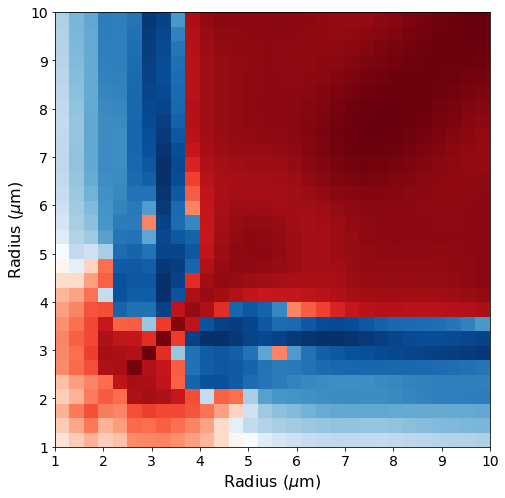

In [15]:
#Display the calculated values in 2 dimensions
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 18



k = np.ma.array(fbjerk+fbjerk.T)
for i in range(0,NN):
    k[i,i]=k[i,i]/2.

minmaxlevel = min(abs(k.min()),abs(k.max()))*1e-8

kp = np.ma.masked_where(k < minmaxlevel , k)
kn = np.ma.masked_where(k > -minmaxlevel, k)
myextent=np.array([ra[0],ra[-1],ra[0],ra[-1]])*1e6

plt.figure(figsize=(8,8))
caxp=plt.imshow(np.ma.log10(kp),interpolation='nearest',origin='lower',\
                extent=myextent,cmap='Reds');

caxn=plt.imshow(np.ma.log10(-kn),interpolation='nearest',origin='lower',\
                extent=myextent,cmap='Blues');
plt.xlabel(r'Radius ($\mu$m)')
plt.ylabel(r'Radius ($\mu$m)');
